# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import folium
from folium import plugins
%matplotlib inline

In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


# Loading Dataset

In [3]:
df = pd.read_excel('RideAustin.xlsx',header=1)
df.head()

completed_on  distance_travelled  end_location_lat  end_location_long  \
0  6/4/16 4:35               285.0             30.27             -97.75   
1  6/4/16 4:51              1029.0             30.27             -97.74   
2  6/4/16 5:27              8459.0             38.68            -121.04   
3  6/4/16 6:51               443.0             38.68            -121.04   
4  6/4/16 8:17               568.0             38.68            -121.04   

    started_on  driver_rating  charity_id requested_car_category  \
0  6/4/16 4:34            5.0         NaN                REGULAR   
1  6/4/16 4:45            5.0         NaN                REGULAR   
2  6/4/16 5:18            5.0         NaN                REGULAR   
3  6/4/16 6:50            5.0         NaN                REGULAR   
4  6/4/16 8:16            3.0         NaN                REGULAR   

   free_credit_used  surge_factor  ...           model  year PRCP TMAX TMIN  \
0               NaN             0  ...             XTS  2013  0.1   86   67   
1               NaN             0  ...             XTS  2013  0.1   86   67   
2               NaN             0  ...  Continental GT  2013  0.1   86   67   
3               NaN             0  ...  Continental GT  2013  0.1   86   67   
4               NaN             0  ...  Continental GT  2013  0.1   86   67   

   AWND  GustSpeed2  Fog  HeavyFog  Thunder  
0   4.9        13.0    1         0        0  
1   4.9        13.0    1         0        0  
2   4.9        13.0    1         0        0  
3   4.9        13.0    1         0        0  
4   4.9        13.0    1         0        0  

[5 rows x 24 columns]

# Data Summary & Statistics

In [4]:
df.shape

(65534, 24)

In [5]:
df.columns.values 

array(['completed_on', 'distance_travelled', 'end_location_lat',
       'end_location_long', 'started_on', 'driver_rating', 'charity_id',
       'requested_car_category', 'free_credit_used', 'surge_factor',
       'start_location_long', 'start_location_lat', 'color', 'make',
       'model', 'year', 'PRCP', 'TMAX', 'TMIN', 'AWND', 'GustSpeed2',
       'Fog', 'HeavyFog', 'Thunder'], dtype=object)

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 24 columns):
completed_on              65534 non-null object
distance_travelled        65532 non-null float64
end_location_lat          65534 non-null float64
end_location_long         65534 non-null float64
started_on                65534 non-null object
driver_rating             55914 non-null float64
charity_id                8623 non-null float64
requested_car_category    65534 non-null object
free_credit_used          20358 non-null float64
surge_factor              65534 non-null int64
start_location_long       65534 non-null float64
start_location_lat        65534 non-null float64
color                     65534 non-null object
make                      65534 non-null object
model                     65534 non-null object
year                      65534 non-null int64
PRCP                      65534 non-null float64
TMAX                      65534 non-null int64
TMIN                  

# Cleaning the data

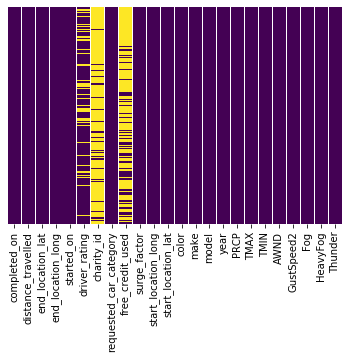

In [7]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

The yellow shades shows the presence of null values

In [8]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

distance_travelled        2
driver_rating          9620
charity_id            56911
free_credit_used      45176
dtype: int64

Four variables have missing values

Missing values in 'free_credit_used' does not need to filled in as we can consider the null values as it gives us an indication that the ride was taken without any free credits. We can replace the null vales with 0, but I prefer to keep it as null

I am not sure what charity_id is and what it means in the context of this dataset and I will not be working on that variable

For the 'driver_rating' variable, we are going to consider the null values to be a seperate rating as we can know if there are any reason why the user did not feel like leaving a rating for the driver.

distance_travelled has only 2 null values. We can either delete them or replace the null values. I am going to replace the null values with the median value of the variable

In [9]:
va=df.distance_travelled.median()
df['distance_travelled'].fillna(va,inplace=True)

distance_travelled has been cleaned with the median of the distance_travelled column



#### Cleaning the 'Color' variable

In [10]:
df.color.unique()

array(['Black', 'Gray', 'Silver', 'White', 'Brown', 'Red', 'Gold', 'Blue',
       'Maroon', 'Grey', 'Orange', 'Yellow/Gold', 'Green', 'Blue ', 'Tan',
       'Teal', 'Burgundy', 'Dark Blue', 'Yellow'], dtype=object)

In [11]:
df['color']=df['color'].replace('Gray','Grey')

In [12]:
df['color']=df['color'].replace('Blue ','Blue')

In [13]:
df.color.unique()

array(['Black', 'Grey', 'Silver', 'White', 'Brown', 'Red', 'Gold', 'Blue',
       'Maroon', 'Orange', 'Yellow/Gold', 'Green', 'Tan', 'Teal',
       'Burgundy', 'Dark Blue', 'Yellow'], dtype=object)

### Splitting the 'started_on' column into 'Date' and 'Time'

In [14]:
df[['Date','Start_Time']] = df.started_on.str.split(expand=True) 

##### Function to determine the name of the month from the Date variable 

In [15]:
def f(row):
   
    if row[0] == '6':
        
        val = 'June'
        
    elif row[0] == '7':
        val = 'July'
    elif row[0] == '8':
        val = 'August'
    else:
       
        val = 'Sep'
    return val

In [16]:
df['Month'] = df['Date'].apply(f)

In [17]:
df.Month.value_counts()

August    37785
July      14647
Sep        9353
June       3749
Name: Month, dtype: int64

In [18]:
df.head()

completed_on  distance_travelled  end_location_lat  end_location_long  \
0  6/4/16 4:35               285.0             30.27             -97.75   
1  6/4/16 4:51              1029.0             30.27             -97.74   
2  6/4/16 5:27              8459.0             38.68            -121.04   
3  6/4/16 6:51               443.0             38.68            -121.04   
4  6/4/16 8:17               568.0             38.68            -121.04   

    started_on  driver_rating  charity_id requested_car_category  \
0  6/4/16 4:34            5.0         NaN                REGULAR   
1  6/4/16 4:45            5.0         NaN                REGULAR   
2  6/4/16 5:18            5.0         NaN                REGULAR   
3  6/4/16 6:50            5.0         NaN                REGULAR   
4  6/4/16 8:16            3.0         NaN                REGULAR   

   free_credit_used  surge_factor  ...  TMAX  TMIN AWND GustSpeed2 Fog  \
0               NaN             0  ...    86    67  4.9       13.0   1   
1               NaN             0  ...    86    67  4.9       13.0   1   
2               NaN             0  ...    86    67  4.9       13.0   1   
3               NaN             0  ...    86    67  4.9       13.0   1   
4               NaN             0  ...    86    67  4.9       13.0   1   

   HeavyFog  Thunder    Date  Start_Time  Month  
0         0        0  6/4/16        4:34   June  
1         0        0  6/4/16        4:45   June  
2         0        0  6/4/16        5:18   June  
3         0        0  6/4/16        6:50   June  
4         0        0  6/4/16        8:16   June  

[5 rows x 27 columns]

# Checking Correlation

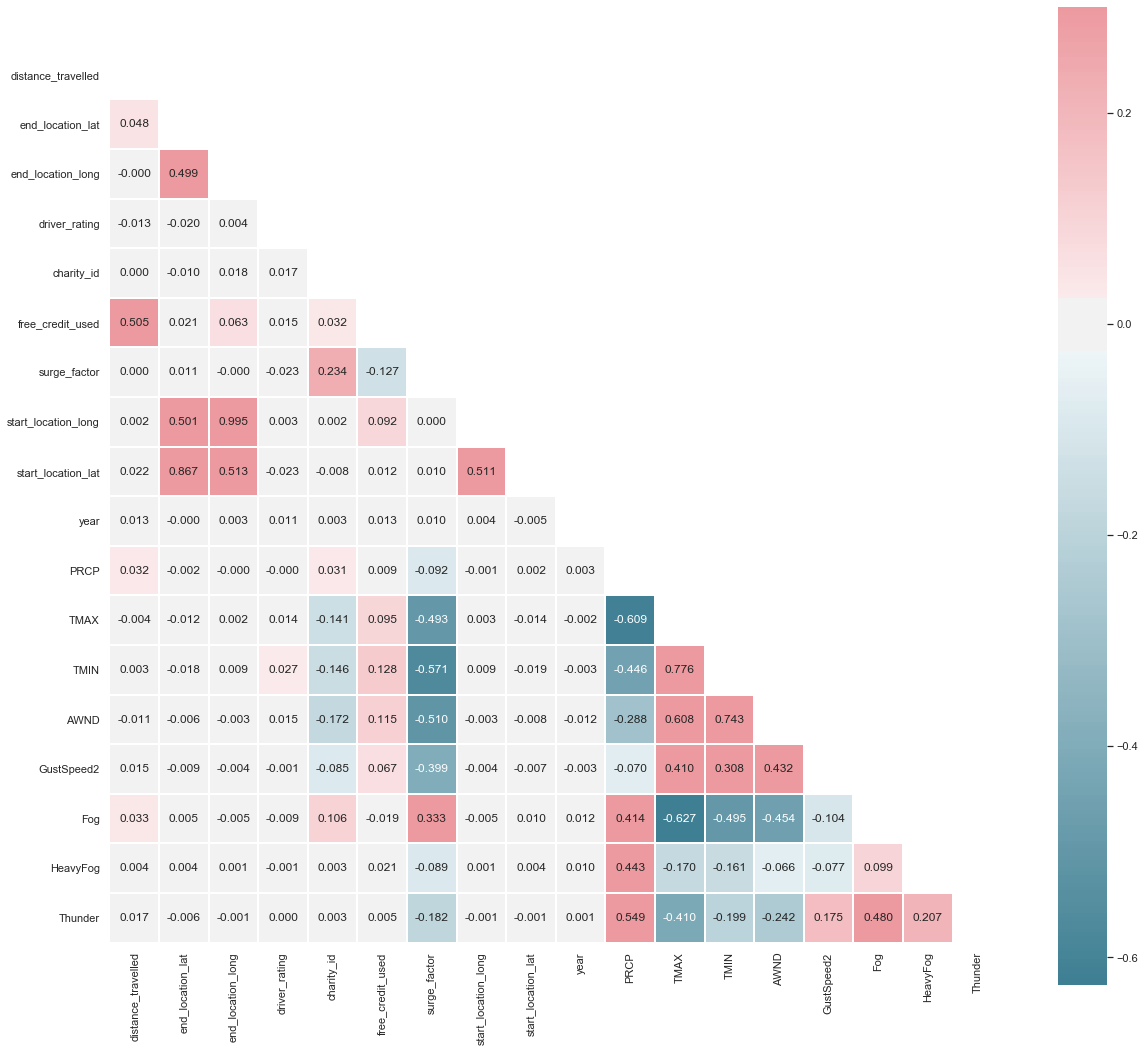

In [19]:
sns.set(style="white")
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 18))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=1, fmt='.3f', annot=True)

The red color means variables are positively correlated, blue color means that the variables are negatively correlated

Takeaways:

1 - The presence of Fog is positively correlated with the surge factor, Fog is a major reason why surge pricing is in effect

2 - PRCP, TMAX, TMIN, AWND, Gust Speed all have a negative correlation on surge factor, meaning thier presence does little to alter surge pricing

3 - free_credit_used has a strong correlation to the distance_travelled. As the distance travelled increases, so does the free credit used.

# Trends and Analysis

### Poor ratings given to shorter rides

Text(0, 0.5, 'Distance Travelled')

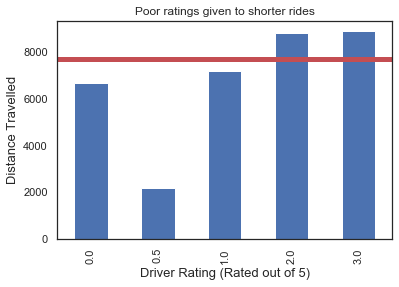

In [20]:
threshold = df[df['driver_rating'].notna()].distance_travelled.mean()

df2=df[df['driver_rating'].isin([0.5,1.0,2.0,0.0,3.0])].groupby(df['driver_rating']).distance_travelled.mean()
values=df2.values

plt.axhline(y=threshold,linewidth=5, color='r')
ax=df2.plot.bar(title="Poor ratings given to shorter rides")
ax.set_xlabel("Driver Rating (Rated out of 5)",fontsize=13)
ax.set_ylabel("Distance Travelled",fontsize=13)

Threshold is the mean of all the values in distance_travelled that have a driver_rating present (not null) 

The red line above indicates the threshold limit.

Takeaways:
    
1 - All the rides that were given low ratings were shorter rides (less than the average ride distance). 

2 - The reason for this cannot be determined with the current data. More data points are needed. 

### Premium rides are preferred by people who are travelling longer distances

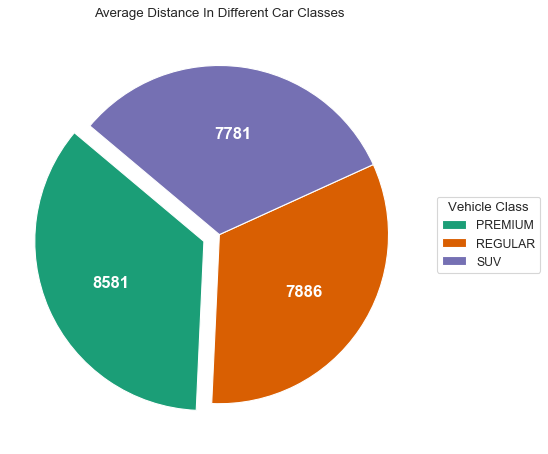

In [21]:
rkc=round(df.groupby('requested_car_category', as_index=False)['distance_travelled'].mean(),2)

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = rkc['distance_travelled']
categories = rkc['requested_car_category']
explode = [0.1,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:d}".format(absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=15, weight=700)
ax.set_title("Average Distance In Different Car Classes")
plt.show()

Takeaways:

1 - To go longer distances, people have generally preferred to request a premium car that the regular models or the SUV.

### Maximum poor ratings given by people picked up near Univ of Austin (could be mostly students)

In [37]:
m = folium.Map([30.2666, -97.7333], zoom_start=11)

In [31]:
df2=df[df['driver_rating']<3.0]

In [39]:
for index, row in df2.iterrows():
    folium.CircleMarker([row['start_location_lat'], row['start_location_long']],
                        radius=1,
                        fill_color="#3db7e4",
                       ).add_to(m)

In [41]:
stationArr = df[['start_location_lat', 'start_location_long']].values

m.add_child(plugins.HeatMap(stationArr, radius=15))
m

### Color of the car having an effect on the rating

In [26]:
car_co=(df[df['driver_rating']<4.0].groupby(['color']).driver_rating.count())/(df.groupby(['color']).color.count())*100

Text(0, 0.5, 'Car Colors')

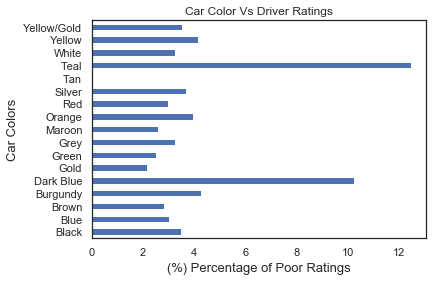

In [27]:
n_ax= car_co.plot.barh(title="Car Color Vs Driver Ratings")
n_ax.set_xlabel("(%) Percentage of Poor Ratings",fontsize=13)
n_ax.set_ylabel("Car Colors",fontsize=13)


The reasons are sort of vague as to why there is a sudden spike in the Teal and Dark Blue colors

Takeaways:

1 - Dark Blue does not have enough sample data points to come to a conclusion. But teal has 249 data points and out of which 12% of the rides have given it a poor rating. 

Need more data to make more sense of this

### Number of rides per month

Text(0, 0.5, 'Number of rides')

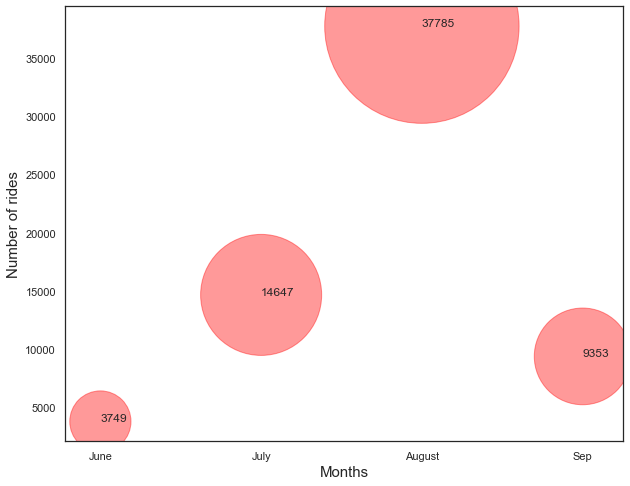

In [28]:
months=df['Month'].unique()
dist=[]
for i in months:   
    dist.append(df.loc[df['Month'] == i, 'distance_travelled'].count())

fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(months, dist, s=dist, c="red", alpha=0.4)

for i, txt in enumerate(dist):
    ax.annotate(txt, (months[i], dist[i]))

ax.set_xlabel('Months', fontsize=15)
ax.set_ylabel('Number of rides', fontsize=15)
